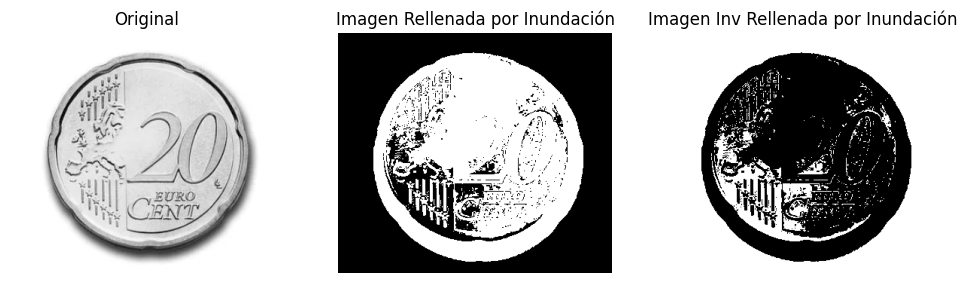

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lee la imagen
im_in = cv2.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/moneda.png", cv2.IMREAD_GRAYSCALE)

# Umbraliza la imagen
th, im_th = cv2.threshold(im_in, 220, 255, cv2.THRESH_BINARY_INV)

# Copia la imagen umbralizada
im_floodfill = im_th.copy()

# Elemento estructurante en forma de cruz de 3x3
elemento_estructurante = np.array([[0, 1, 0],
                                   [1, 1, 1],
                                   [0, 1, 0]], dtype=np.uint8)

# Máscara utilizada para el relleno por inundación
h, w = im_th.shape[:2]
seed_point = (w // 2, h // 2)  # Punto de inicio en el centro de la imagen
mask = np.zeros((h+2, w+2), np.uint8)

# Función para rellenar por inundación manualmente
def flood_fill_manual(image, seed_point, fill_value):
    # Crea una copia de la imagen para mantener el original
    filled_image = image.copy()
    # Crea una lista de puntos de semilla
    seed_points = [seed_point]
    while seed_points:
        # Toma el primer punto de la lista de puntos de semilla
        x, y = seed_points.pop(0)
        # Verifica si el punto está dentro de los límites de la imagen
        if 0 <= x < w and 0 <= y < h and filled_image[y, x] != fill_value:
            # Rellena el punto con el valor especificado
            filled_image[y, x] = fill_value
            # Agrega los puntos adyacentes a la lista de puntos de semilla
            seed_points.extend([(x+1, y), (x-1, y), (x, y+1), (x, y-1)])
    return filled_image

# Realiza el relleno por inundación manual
im_floodfill_manual = flood_fill_manual(im_floodfill, seed_point, 255)

# Invierte la imagen rellenada por inundación
im_floodfill_inv = cv2.bitwise_not(im_floodfill_manual)


# --- Resultados --- #
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(im_in, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(im_floodfill_manual, cmap='gray')
plt.title("Imagen Rellenada por Inundación")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(im_floodfill_inv, cmap='gray')
plt.title("Imagen Inv Rellenada por Inundación")
plt.axis('off')

plt.show()